Unloading the dataset from the zip file

In [ ]:
!unzip english.zip

Archive:  english.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Loading the Data

In [ ]:
data = pd.read_csv("/content/A_Z Handwritten Data.csv").astype('float32')
print(data.head(5))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 785 columns]


Loading the dataset and splitting it

In [ ]:
X = data.drop('0',axis = 1)
y = data['0']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshaping the feature matrices for training and testing
X_train = X_train.values.reshape((X_train.shape[0],28,28))
X_test = X_test.values.reshape((X_test.shape[0],28,28))

# Displaying the shapes of the training and testing data
print("Size of training dataset: ", X_train.shape)
print("Size of testing dataset: ", X_test.shape)


Size of training dataset:  (297960, 28, 28)
Size of testing dataset:  (74490, 28, 28)


Printing the frequency of each label in the dataset

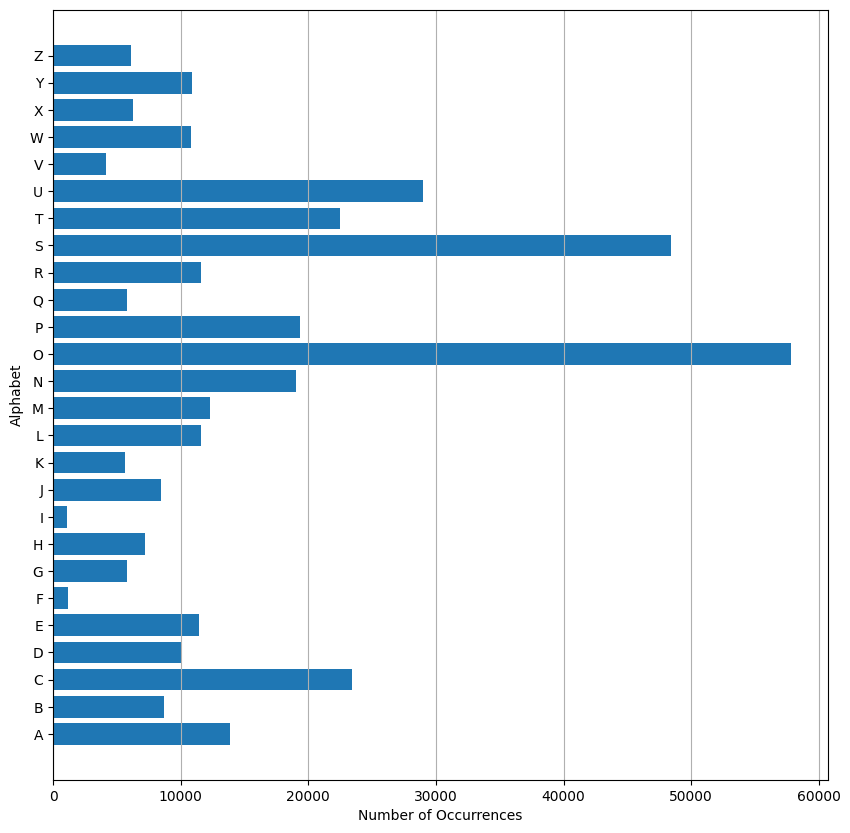

In [ ]:
# Transform y values to integer type
numeric_y = y.astype(int)

# Calculate frequency for each unique number
frequency = np.bincount(numeric_y, minlength=26)

alphabet_map = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I',
    9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q',
    17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

# Extract alphabet labels from the dictionary
alphabets = list(alphabet_map.values())

# Visualize the frequencies
figure, axis = plt.subplots(figsize=(10, 10))
axis.barh(alphabets, frequency)

axis.set_xlabel("Number of Occurrences")
axis.set_ylabel("Alphabet")
axis.grid(axis='x')
plt.show()


Plotting the data

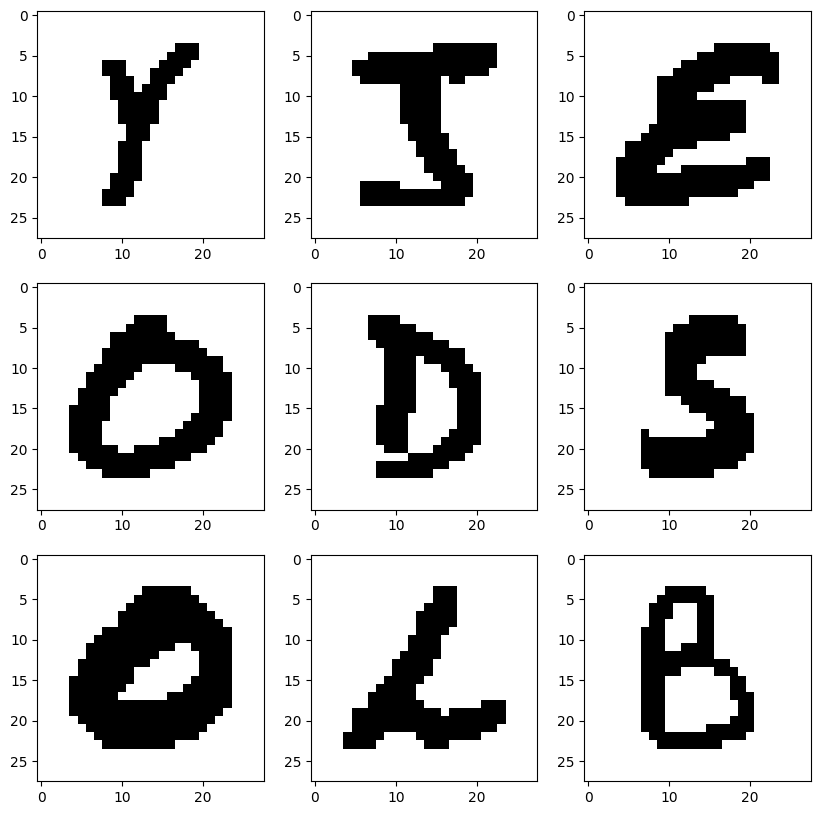

In [ ]:
shuffled_data = np.random.permutation(X_train[:100])
figure, axes_array = plt.subplots(3, 3, figsize=(10, 10))
flattened_axes_list = axes_array.flatten()

for position in range(9):
    _, thresholded_img = cv2.threshold(shuffled_data[position], 30, 200, cv2.THRESH_BINARY)
    flattened_axes_list[position].imshow(thresholded_img.reshape(28, 28), cmap="Greys")

plt.show()


CNN Implementation

In [ ]:
# Reshaping the training data for compatibility with the model
train_data = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print("Updated training data dimensions: ", train_data.shape)

# Reshaping the testing data similarly
test_data = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("Updated testing data dimensions: ", test_data.shape)


Updated training data dimensions:  (297960, 28, 28, 1)
Updated testing data dimensions:  (74490, 28, 28, 1)


In [ ]:
train_y = to_categorical(y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_y.shape)

test_y = to_categorical(y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_y.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, train_y, epochs=1,  validation_data = (X_test,test_y))

9312/9312 [==============================] - 476s 51ms/step - loss: 0.1634 - accuracy: 0.9558 - val_loss: 0.0842 - val_accuracy: 0.9764


In [ ]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9763860702514648]
The training accuracy is : [0.9558128714561462]
The validation loss is : [0.08422369509935379]
The training loss is : [0.16342633962631226]


Confusion Matrix for CNN

2328/2328 [==============================] - 33s 14ms/step


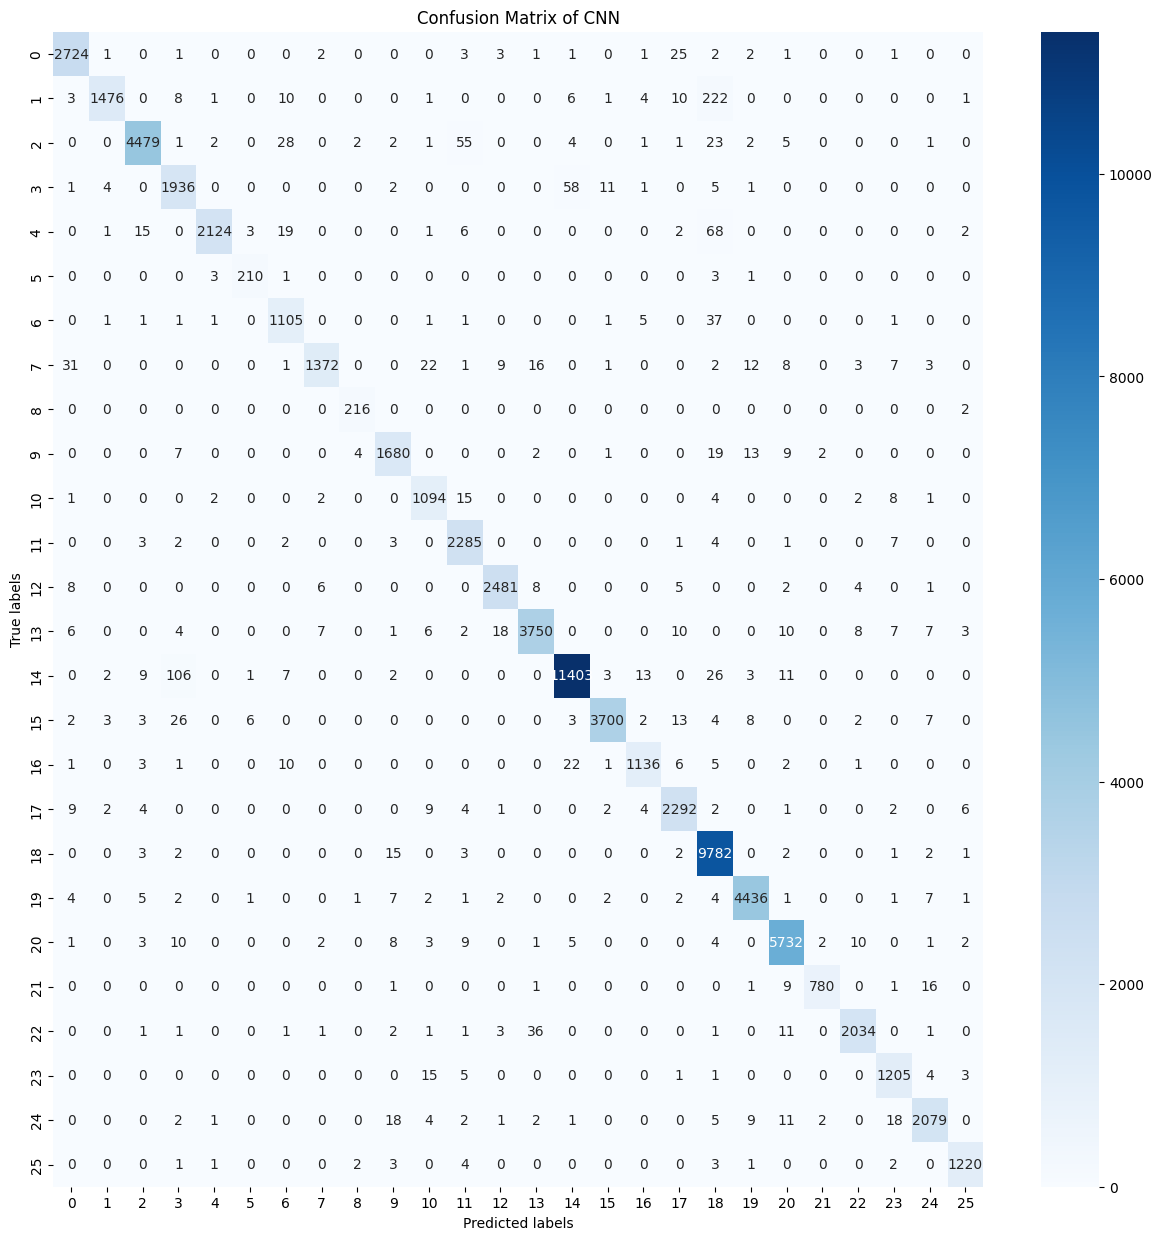

In [ ]:


# Predict classes using the model
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_y, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of CNN')
plt.show()


CNN Prediction on new data

1/1 [==============================] - 0s 437ms/step


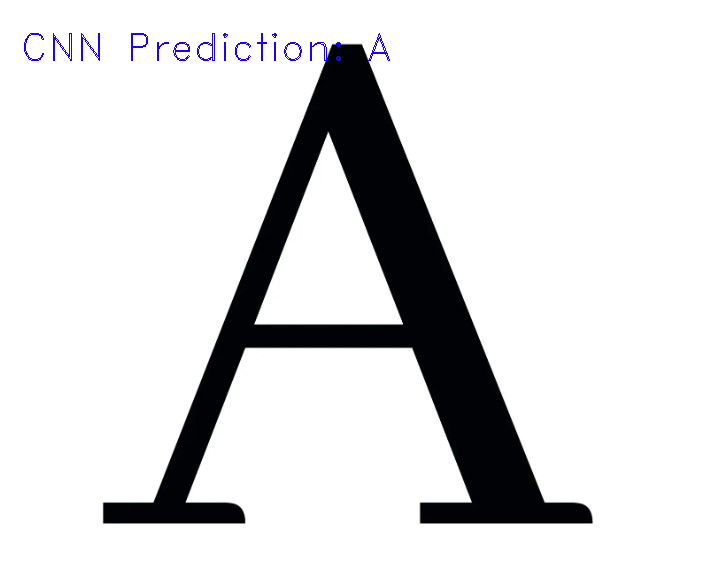

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/alpha.jpg')


# For CNN
img_for_cnn = img.copy()
img_final_cnn = cv2.resize(img_thresh, (28,28))
img_final_cnn = np.reshape(img_final_cnn, (1,28,28,1))

img_pred_cnn = words[np.argmax(model.predict(img_final_cnn))]

cv2.putText(img_for_cnn, "CNN Prediction: " + img_pred_cnn, (20,60), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))

cv2_imshow(img_for_cnn)


KNN Implementation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


# Split data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2)

# Reduce dimensionality using PCA
pca = PCA(n_components=100)  # Adjust n_components based on desired explained variance
X_train_pca = pca.fit_transform(X_train_knn)
X_test_pca = pca.transform(X_test_knn)

# Train KNN classifier on reduced data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_knn, y_train_knn)

# Predict using KNN
y_pred_knn = knn.predict(X_test_knn)
knn_accuracy = accuracy_score(y_test_knn, y_pred_knn)
# Print KNN results
print("KNN Results:")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy:",knn_accuracy )

KNN Results:
              precision    recall  f1-score   support

         0.0       0.04      0.04      0.04      2768
         1.0       0.02      0.02      0.02      1743
         2.0       0.06      0.07      0.07      4607
         3.0       0.02      0.02      0.02      2019
         4.0       0.03      0.03      0.03      2241
         5.0       0.00      0.00      0.00       218
         6.0       0.02      0.01      0.02      1155
         7.0       0.02      0.02      0.02      1488
         8.0       0.00      0.00      0.00       218
         9.0       0.03      0.02      0.02      1737
        10.0       0.01      0.01      0.01      1129
        11.0       0.03      0.04      0.04      2308
        12.0       0.03      0.03      0.03      2515
        13.0       0.05      0.05      0.05      3839
        14.0       0.16      0.17      0.16     11586
        15.0       0.05      0.05      0.05      3779
        16.0       0.03      0.02      0.02      1188
        17.0  

Confusion Matrix for KNN

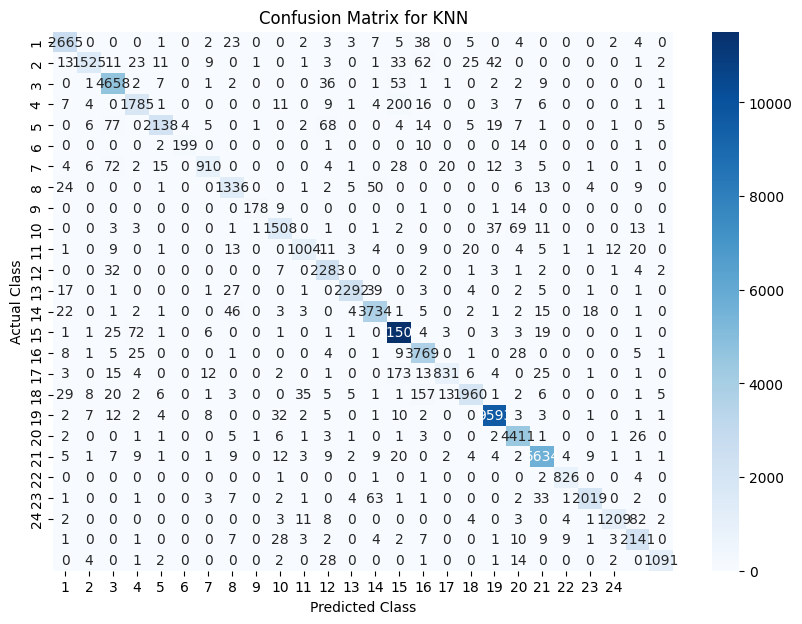

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the classifier

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test_knn, y_pred_knn)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=range(1, 25), yticklabels=range(1, 25))
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for KNN')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


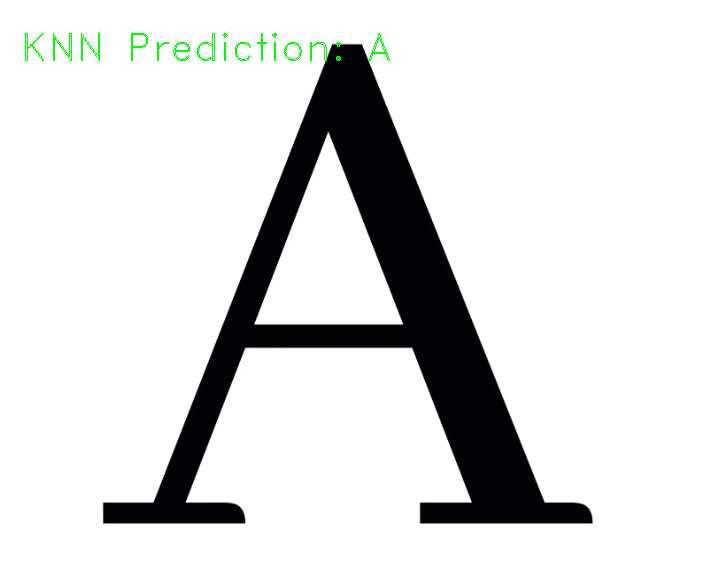

In [ ]:
# For KNN
img_for_knn = img.copy()
img_final_knn = cv2.resize(img_thresh, (28, 28)).reshape(1, 28*28)

img_pred_knn = words[knn.predict(img_final_knn)[0]]

cv2.putText(img_for_knn, "KNN Prediction: " + img_pred_knn, (20,60), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))

cv2_imshow(img_for_knn)


Random Forest Implementation

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2)
# Reducing dimensionality using PCA
pca = PCA(n_components=100)
X_train_pca_rf = pca.fit_transform(X_train_rf)
X_test_pca_rf = pca.transform(X_test_rf)
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_pca_rf, y_train_rf)
y_pred_forest = forest.predict(X_test_pca_rf)
accuracy_forest = accuracy_score(y_test_rf, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest*100:.2f}%")


Random Forest Accuracy: 97.93%


Confusion Matrix for Random Forest

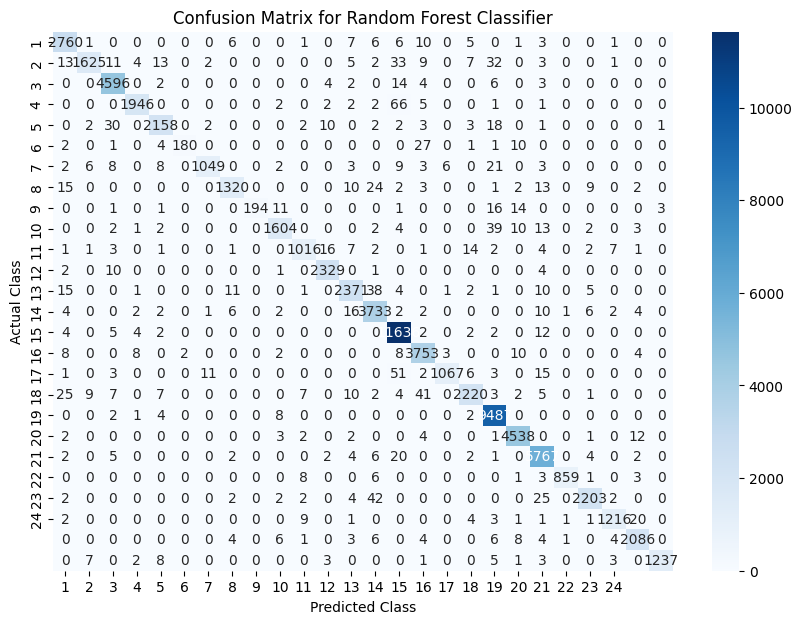

In [ ]:
conf_mat = confusion_matrix(y_test_rf, y_pred_forest)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=range(1, 25), yticklabels=range(1, 25))
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


Predicting using Random Forest on new data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


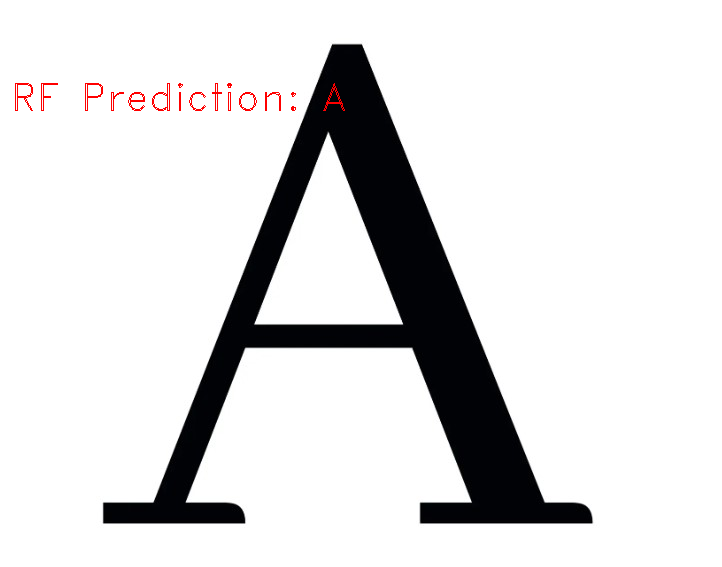

In [ ]:
# For Random Forest
img_for_rf = img.copy()
img_final_rf = cv2.resize(img_thresh, (28, 28)).reshape(1, 28*28)
img_final_rf_pca = pca.transform(img_final_rf)

img_pred_rf = words[forest.predict(img_final_rf_pca)[0]]

cv2.putText(img_for_rf, "RF Prediction: " + img_pred_rf, (10,110), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,0,255))

cv2_imshow(img_for_rf)


Comparing the algorithms

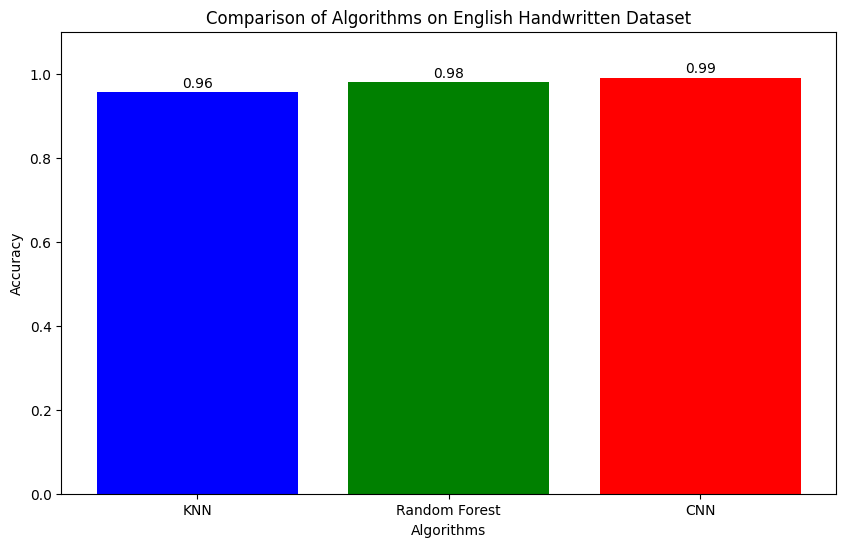

In [ ]:
import matplotlib.pyplot as plt

# Store accuracies in a list
cnn_accuracy = 0.99
accuracies = [knn_accuracy, accuracy_forest , cnn_accuracy]
labels = ['KNN', 'Random Forest', 'CNN']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color=['blue', 'green', 'red'])

# Annotate each bar with its accuracy value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Comparison of Algorithms on English Handwritten Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.ylim(0, 1.1)  # adjust this depending on your accuracy range

# Show the plot
plt.show()
